In [3]:
import time
import datetime
import numpy as np
from datetime import datetime as dt
from tqdm import *
from datetime import datetime as dt
from tqdm import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import os,sys
sys.path.append('../xlib/src/')

In [5]:
from expriment.dataset_monitor import gen_monitor_dp
dp =  gen_monitor_dp()

Load rawdata from disk done. path=../xlib/src/xdata/../../data/044A02上隅角_2min.mean.pkl
eval feature done. start to transform to dataframe..
raw_value StaticFeature(MonitorValue) ['SensorID', 'Time']
RMean_5 RMean(StaticFeature(MonitorValue),5,args:) ['SensorID', 'Time']
RMean_15 RMean(StaticFeature(MonitorValue),15,args:) ['SensorID', 'Time']
RMean_30 RMean(StaticFeature(MonitorValue),30,args:) ['SensorID', 'Time']
RMean_60 RMean(StaticFeature(MonitorValue),60,args:) ['SensorID', 'Time']
RMax_5 RMax(StaticFeature(MonitorValue),5,args:) ['SensorID', 'Time']
RMax_15 RMax(StaticFeature(MonitorValue),15,args:) ['SensorID', 'Time']
RMax_30 RMax(StaticFeature(MonitorValue),30,args:) ['SensorID', 'Time']
RMax_60 RMax(StaticFeature(MonitorValue),60,args:) ['SensorID', 'Time']
RMin_5 RMin(StaticFeature(MonitorValue),5,args:) ['SensorID', 'Time']
RMin_15 RMin(StaticFeature(MonitorValue),15,args:) ['SensorID', 'Time']
RMin_30 RMin(StaticFeature(MonitorValue),30,args:) ['SensorID', 'Time']
RMin_60

In [21]:
train, valid, test = next(dp.next())
ytrain = train[dp.final_label]
yvalid = valid[dp.final_label]
ytest = test[dp.final_label]

In [22]:
all_y = pd.concat([ytrain,yvalid,ytest]).sort_index().reset_index(level=0,drop=True)

In [23]:
train_y = all_y[pd.Timestamp('2017-11-01 00:00:00'):pd.Timestamp('2017-11-29 12:30:00')]
test_y = all_y[pd.Timestamp('2017-11-29 12:30:00'):pd.Timestamp('2017-11-29 13:00:00')]

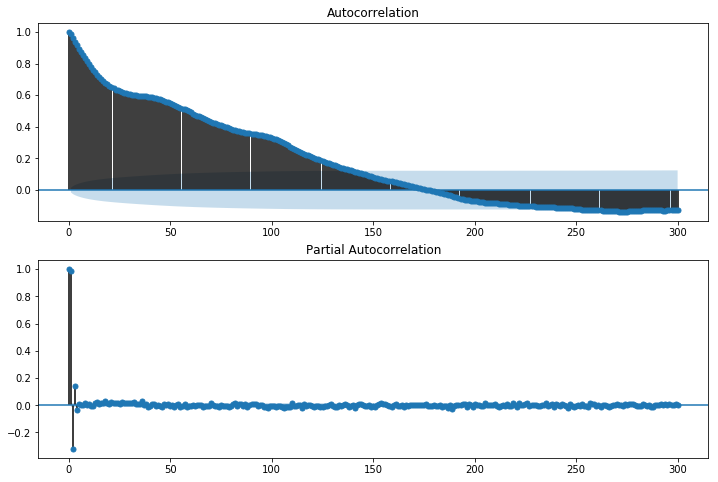

In [38]:
for i in range(1):
    i += 1
#     dta = train_y.diff(i).iloc[i:]
    dta = ytrain
    fig = plt.figure(figsize=(12,8))
    ax1=fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(dta,lags=300,ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(dta,lags=300,ax=ax2)
#     break

In [ ]:
arma_mod20 = sm.tsa.ARMA(dta,(150,4)).fit()

/usr/local/Cellar/python3/3.6.0_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [27]:
period = 10
res = arma_mod20.forecast(period)
inter = pd.Timedelta(minutes=2)
start = train_y.index.get_level_values(level=0).max() + inter
end = start + (period-1) *inter
freq = '2min'
tr = pd.date_range(start=start, end=end, freq=freq)
pred = pd.DataFrame({'temp_pred':res[0],
                     'temp_pred_min':res[2][:,0],
                     'temp_pred_max':res[2][:,1],
                     'confi':res[1]},index=tr)
pred['ori'] = test_y
def recover(pre,ori_val):
    return pre.cumsum() + ori_val
for t in ['pred','pred_max','pred_min']:
    pred[t] = recover(pred['temp_%s' % t], train_y.iloc[-1])

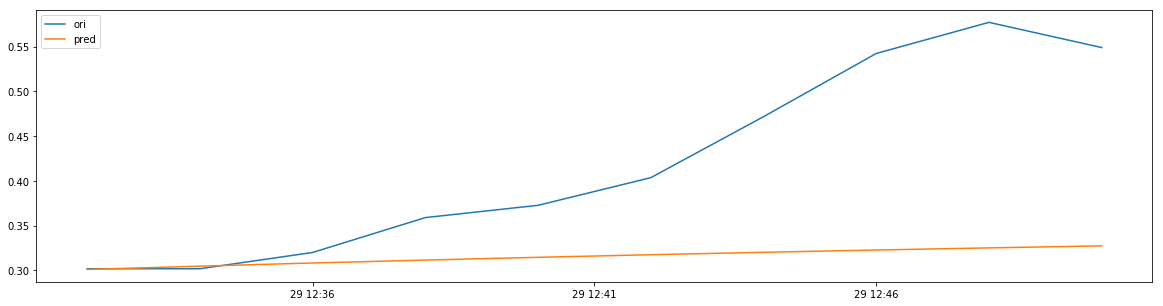

In [30]:
def plot(pred):
    plt.figure(figsize=(20, 5))
#     pred = pred.reset_index()
    plt.plot( pred['ori'], label='ori')
    plt.plot(pred['pred'],label='pred')
#     plt.plot(pred['pred_max'],label='pred_max')
#     plt.plot(pred['pred_min'],label='pred_min')
    plt.legend()
plot(pred)
# pred

In [29]:
dta.shape

(19927,)

In [34]:
pred['diff'] = pred['ori'].diff()
pred['cu'] = pred['temp_pred']

In [35]:
pred

,confi,temp_pred,temp_pred_max,temp_pred_min,ori,pred,pred_max,pred_min,diff,cu
2017-11-29 12:32:00,0.016767,-0.000797,0.032066,-0.033660,0.301818,0.301021,0.333884,0.268159,NaN,-0.000797
2017-11-29 12:34:00,0.017945,0.003678,0.038851,-0.031494,0.301818,0.304700,0.372735,0.236665,0.000000,0.003678
2017-11-29 12:36:00,0.017955,0.003527,0.038718,-0.031665,0.320000,0.308226,0.411453,0.205000,0.018182,0.003527
2017-11-29 12:38:00,0.017985,0.003273,0.038522,-0.031977,0.359000,0.311499,0.449975,0.173022,0.039000,0.003273
2017-11-29 12:40:00,0.018000,0.003089,0.038368,-0.032191,0.372727,0.314587,0.488344,0.140831,0.013727,0.003089
2017-11-29 12:42:00,0.018018,0.002890,0.038205,-0.032425,0.403636,0.317477,0.526548,0.108406,0.030909,0.002890
2017-11-29 12:44:00,0.018032,0.002716,0.038057,-0.032626,0.471818,0.320193,0.564605,0.075780,0.068182,0.002716
2017-11-29 12:46:00,0.018045,0.002546,0.037913,-0.032821,0.542500,0.322739,0.602519,0.042959,0.070682,0.002546
2017-11-29 12:48:00,0.018056,0.002391,0.037779,-0.032998,0.577273,0.325130,0.640298,0.009961,0.034773,0.002391
2017-11-29 12:50:00,0.018066,0.002243,0.037651,-0.033165,0.549091,0.327373,0.677949,-0.023204,-0.028182,0.002243
